![molprop](https://storage.googleapis.com/polaris-public/icons/icons8-fox-60-kinases.png)
# Benchmark for KIT and mutants


### Background
**KIT** (Proto-oncogene c-KIT) receptor plays a crucial role in regulating cell growth, differentiation, and survival. It's particularly important in the development of blood cells, melanocytes (the cells that produce melanin, the pigment responsible for skin, hair, and eye color), and certain cells in the gut. Mutations in the KIT gene can lead to uncontrolled cell growth and contribute to the development of certain types of cancer, including gastrointestinal stromal tumors (GISTs) and some types of leukemia

### Benchmarking

- **KIT wild type**:  In certain cancers, KIT signaling can be activated by other receptors or mutations upstream in the signaling pathway. Targeting these upstream factors can indirectly impact KIT signaling and downstream effects. An example of this is seen in some cases of acute myeloid leukemia (AML) where KIT is expressed without mutations, but other upstream mutations can lead to aberrant KIT activation.
- **KIT selectivity**: This dataset includes KIT wild type and reported mutants `KIT T6701`, `KIT V560G`. D816V results in constitutive phosphorylation of Kit, activation of Stat5 signaling (PMID: 19865100, PMID: 18390729), induces mastocytosis and tumor formation in mice (PMID: 21148330) and confers resistance to Kit inhibitors (PMID: 22301675, PMID: 19164557). 

The goal of this benchmark is to select the best predictive model for 
- Optimization of the bioactivity % inhibition.
- Discovery of potential hits in new chemical space.


## Description of readout:
- **Readouts**: `KIT`, `KIT_T670I`, `KIT_V560G`
- **Bioassay readout**: percentage of inhibition.
- **Optimization objective**: Higher inhibition


### Data resource: 
- **Reference**: [PKIS1](https://pubmed.ncbi.nlm.nih.gov/26501955)

### Train/test split
Given the benchmarking goal, a scaffold-based splitting approach was applied to ensure training and test sets contain distinct chemical structures while maintaining the diversity of scaffolds.


In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pathlib

import datamol as dm

# polaris benchmark
from polaris.benchmark import MultiTaskBenchmarkSpecification

# polaris hub
from polaris.utils.types import HubOwner

# utils
root = pathlib.Path("__file__").absolute().parents[3]
os.chdir(root)
sys.path.insert(0, str(root))
from utils.docs_utils import load_readme

In [17]:
# Get the owner and organization
org = "polaris"
data_name = "drewry2014_pkis1_subset"
dataset_version = "v3"
dataset_name = f"drewry2014_pkis1_subset-{dataset_version}"
dirname = dm.fs.join(root, f"org-{org}", data_name)
gcp_root = f"gs://polaris-public/polaris-recipes/org-{org}/{data_name}"

owner = HubOwner(slug=org, type="organization")
owner

HubOwner(slug='polaris', external_id=None, type='organization')

In [3]:
BENCHMARK_DIR = f"{gcp_root}/benchmarks"
DATASET_JSON = f"{gcp_root}/datasets/{dataset_name}/dataset.json"

FIGURE_DIR = f"{gcp_root}/figures"

## Load existing dataset object
> To **maintain consistency** with other benchmarks in the Polaris Hub, a thorough data curation process is carried out to ensure the accuracy of molecular presentations.
> Therefore, the raw data from the data resource is not used here. 
> See more curation details in [here](https://github.com/polaris-hub/polaris-recipes/blob/mvp/03_Kinases/LOK_SLK).


In [4]:
# Load the saved Dataset
from polaris.dataset import Dataset

dataset = Dataset.from_json(DATASET_JSON)

In [5]:
# Display dataset
dataset

2024-07-30 12:47:11.132 | INFO     | polaris.mixins._checksum:md5sum:27 - Computing the checksum. This can be slow for large datasets.


{
  "name": "drewry2014_pkis1_subset-v3",
  "description": "A subset of PKIS dataset only including EGFR, RET, KIT kinases. PKIS is a data set of 367 small-molecule ATP-competitive kinase inhibitors that was screened by the set in activity assays with 224 recombinant kinases and 24 G protein-coupled receptors and in cellular assays of cancer cell proliferation and angiogenesis.",
  "tags": [
    "Kinase",
    "HitDiscovery",
    "Selectivity"
  ],
  "user_attributes": {
    "year": "2014"
  },
  "owner": "polaris",
  "polaris_version": "0.7.9",
  "default_adapters": {},
  "zarr_root_path": null,
  "readme": "![kinase](https://storage.googleapis.com/polaris-public/icons/icons8-fox-60-kinases.png)\n\n## Background:\n Kinases play a crucial role in cellular signalling, making them important targets for drug development. Dysregulation of kinases is frequently implicated in diseases like cancer, inflammation, and neurodegenerative disorders. Therefore, targeting kinases with specific drugs has emerged as a crucial strategy in modern drug discovery. Kinase-related task includes inhibition prediction, selectivity prediction, or kinase-ligand binding affinity prediction. In the early release version of Polaris, benchmarks were established for kinases such as EGFR, KIT, and RET, along with their respective mutations.\n\n\n## Description of readout \n- **Readouts**:\n    - `EGFR`, `EGFR_L858R`, `EGFR_L861Q`, `EGFR_T790M`, `EGFR_T790M-L858R`\n    - `KIT`, `KIT_D816V`, `KIT_T6701`, `KIT_V560G`\n    - `RET`, `RET_V804L`, `RET_Y791F`\n- **Bioassay readout**: Percentage of inhibition (%).\n- **Optimization objective**: Higher potency (higher %inhibition).\n\n\n## Data resource:\nPKIS 1: A set of 364 unique small-molecule ATP-competitive kinase inhibitors that was screened by the set in activity assays with 224 recombinant kinases and 24 G protein-coupled receptors and in cellular assays of cancer cell proliferation and angiogenesis.\n\n**Reference**: https://pubmed.ncbi.nlm.nih.gov/26501955\n\n",
  "annotations": {
    "MOL_molhash_id": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": "Molecular hash ID. See <datamol.mol.hash_mol>",
      "user_attributes": {},
      "dtype": "object"
    },
    "MOL_smiles": {
      "is_pointer": false,
      "modality": "MOLECULE",
      "description": "Molecule SMILES string",
      "user_attributes": {},
      "dtype": "object"
    },
    "EGFR_L858R": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": "Percentage of inhibition on EGFR with mutation NaN",
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS1",
        "mutation": "NaN",
        "target": "EGFR"
      },
      "dtype": "float64"
    },
    "EGFR": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": "Percentage of inhibition on EGFR with mutation NaN",
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS1",
        "mutation": "NaN",
        "target": "EGFR"
      },
      "dtype": "float64"
    },
    "KIT_T6701": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": "Percentage of inhibition on KIT with mutation NaN",
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS1",
        "mutation": "NaN",
        "target": "KIT"
      },
      "dtype": "float64"
    },
    "KIT_V560G": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": "Percentage of inhibition on KIT with mutation NaN",
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS1",
      

<a id="benchmark"></a>
## Benchmark creation with `Polaris`
Creating a benchmark involves setting up a standard dataset, designing the train-validation-test set and defining evaluation metrics which is used to establish baseline performance level. 

In [6]:
# data columns
data_cols = ["KIT", "KIT_T6701", "KIT_V560G"]

In [7]:
from polaris.utils.types import HubOwner

owner = HubOwner(organizationId="PolarisTest", slug="polaristest")
owner

HubOwner(slug='polaristest', external_id=None, type=None)

### Create scaffold split for `KIT & mutants` dataset
> **Note:**
> Here we use splitting tool `Splito` to split dataset to train and test. \
> [Splito](https://github.com/datamol-io/splito) is a machine learning dataset splitting library for life sciences.

In [8]:
# scaffold split
from splito import ScaffoldSplit

mol_col = "MOL_smiles"
split_key = "scaffold_split"
TEST_SIZE = 0.2
SEED = 780
splitter = ScaffoldSplit(
    smiles=dataset.table[mol_col].values,
    test_size=TEST_SIZE,
    random_state=SEED,
)
scaffold_split = next(splitter.split(X=dataset.table[mol_col].values))

### Check distribution of train/test set in the chemical space

  0%|          | 0/366 [00:00<?, ?it/s]

'https://storage.googleapis.com/polaris-public/polaris-recipes/org-polaris/drewry2014_pkis1_subset/figures/kit-wt-mut_scaffold_split_chemspace.png'

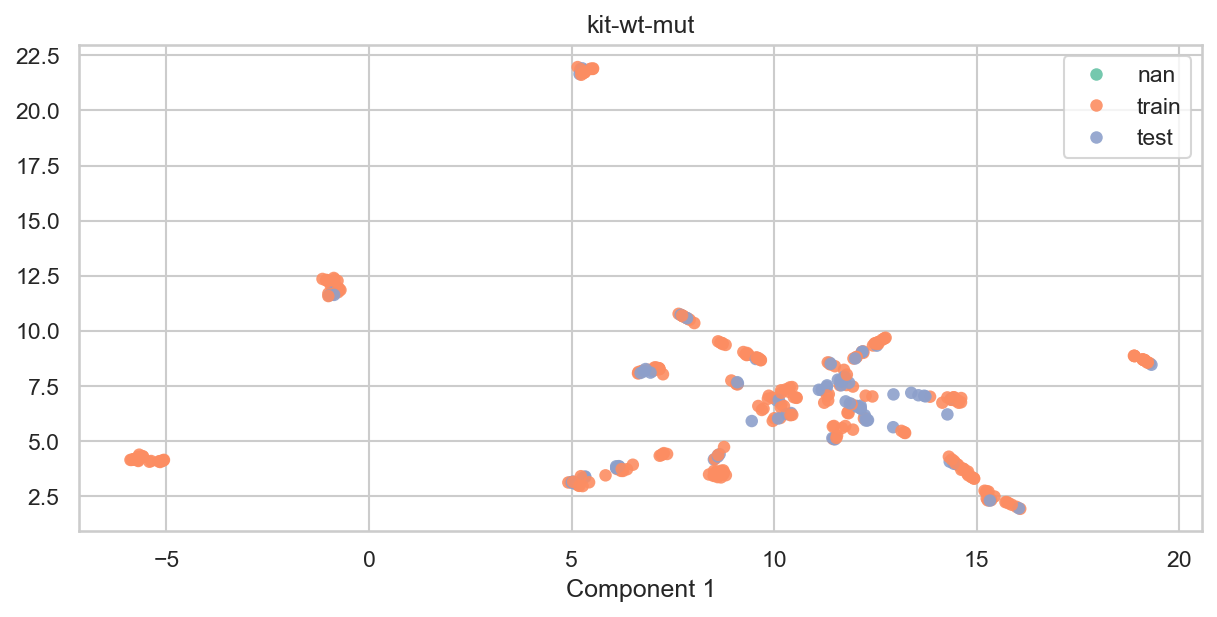

In [9]:
from utils.docs_utils import visualize_split_chemspace

fig = visualize_split_chemspace(
    mols=dataset.table[mol_col].to_list(),
    train_test_dict={"kit-wt-mut": scaffold_split},
)

# export the figure to remote path
from utils.auroris_utils import save_image

save_image(fig, dm.fs.join(FIGURE_DIR, f"kit-wt-mut_{split_key}_chemspace.png"))

## Single task for KIT and mutants with scaffold split 

**Regression tasks**

In [15]:
benchmark_version = "v3"
benchmark_name = f"pkis1-kit-wt-mut-reg-{benchmark_version}"
readme_name = "pkis1-kit-wt-mut-reg"
BENCHMARK_SAVE_DIR = f"{BENCHMARK_DIR}/{benchmark_name}"

benchmark_reg = MultiTaskBenchmarkSpecification(
    name=benchmark_name,
    dataset=dataset,
    target_cols=data_cols,
    target_types={col: "regression" for col in data_cols},
    input_cols=mol_col,
    split=scaffold_split,
    main_metric="mean_squared_error",
    metrics=[
        "mean_absolute_error",
        "mean_squared_error",
        "r2",
        "spearmanr",
        "pearsonr",
        "explained_var",
    ],
    tags=["kinase", "hit-discovery", "selectivity", "multitask"],
    description="A multitask regression benchmark for KIT wild type, T670I mutant and KV560G_mutant.",
    owner=owner,
    readme=load_readme(
        "org-Polaris/drewry2014_pkis1_subset/benchmarks/readme/020_pkis1-kit-wt-mut_reg_readme.md"
    ),
)
path = benchmark_reg.to_json(BENCHMARK_SAVE_DIR)
print(path)

2024-07-30 12:48:21.331 | INFO     | polaris.mixins._checksum:md5sum:27 - Computing the checksum. This can be slow for large datasets.


gs://polaris-public/polaris-recipes/org-polaris/drewry2014_pkis1_subset/benchmarks/pkis1-kit-wt-mut-reg-v3/benchmark.json


In [18]:
# Upload to hub
benchmark_reg.upload_to_hub(owner=owner, access="private")

✅ SUCCESS: Your benchmark has been successfully uploaded to the Hub. View it here: https://polarishub.io/benchmarks/polaris/pkis1-kit-wt-mut-reg-v3
 


{'id': 'Gf0boJ4GFrl0h26b2S0A2',
 'createdAt': '2024-07-30T16:49:04.329Z',
 'deletedAt': None,
 'name': 'pkis1-kit-wt-mut-reg-v3',
 'slug': 'pkis1-kit-wt-mut-reg-v3',
 'description': 'A multitask regression benchmark for KIT wild type, T670I mutant and KV560G_mutant.',
 'tags': ['kinase', 'hit-discovery', 'selectivity', 'multitask'],
 'userAttributes': {},
 'access': 'private',
 'isCertified': False,
 'polarisVersion': '0.7.9',
 'readme': "\n### Background\n**KIT** (Proto-oncogene c-KIT) receptor plays a crucial role in regulating cell growth, differentiation, and survival. It's particularly important in the development of blood cells, melanocytes (the cells that produce melanin, the pigment responsible for skin, hair, and eye color), and certain cells in the gut. Mutations in the KIT gene can lead to uncontrolled cell growth and contribute to the development of certain types of cancer, including gastrointestinal stromal tumors (GISTs) and some types of leukemia\n\n### Benchmarking\n\n-

**Classification tasks**

In [19]:
data_cols = ["CLS_KIT_T6701", "CLS_KIT_V560G", "CLS_KIT"]
benchmark_name = f"pkis1-kit-wt-mut-cls-{benchmark_version}"
BENCHMARK_SAVE_DIR = f"{BENCHMARK_DIR}/{benchmark_name}"

benchmark_cls = MultiTaskBenchmarkSpecification(
    name=benchmark_name,
    dataset=dataset,
    target_cols=data_cols,
    target_types={col: "classification" for col in data_cols},
    input_cols=mol_col,
    split=scaffold_split,
    main_metric="pr_auc",
    metrics=["accuracy", "f1", "roc_auc", "pr_auc", "mcc", "cohen_kappa"],
    tags=["kinase", "hit-discovery", "selectivity", "multitask"],
    description="A multitask classification benchmark for KIT wild type, T670I mutant and KV560G_mutant.",
    owner=owner,
    readme=load_readme(
        "org-Polaris/drewry2014_pkis1_subset/benchmarks/readme/021_pkis1-kit-wt-mut_cls_readme.md"
    ),
)
path = benchmark_cls.to_json(BENCHMARK_SAVE_DIR)
print(path)

2024-07-30 12:49:13.020 | INFO     | polaris.mixins._checksum:md5sum:27 - Computing the checksum. This can be slow for large datasets.


gs://polaris-public/polaris-recipes/org-polaris/drewry2014_pkis1_subset/benchmarks/pkis1-kit-wt-mut-cls-v3/benchmark.json


In [20]:
# Upload to hub
benchmark_cls.upload_to_hub(owner=owner, access="private")

✅ SUCCESS: Your benchmark has been successfully uploaded to the Hub. View it here: https://polarishub.io/benchmarks/polaris/pkis1-kit-wt-mut-cls-v3
 


{'id': 'VDBnAkv1aFB8R6MU7kHr9',
 'createdAt': '2024-07-30T16:49:16.519Z',
 'deletedAt': None,
 'name': 'pkis1-kit-wt-mut-cls-v3',
 'slug': 'pkis1-kit-wt-mut-cls-v3',
 'description': 'A multitask classification benchmark for KIT wild type, T670I mutant and KV560G_mutant.',
 'tags': ['kinase', 'hit-discovery', 'selectivity', 'multitask'],
 'userAttributes': {},
 'access': 'private',
 'isCertified': False,
 'polarisVersion': '0.7.9',
 'readme': "\n### Background\n**KIT** (Proto-oncogene c-KIT) receptor plays a crucial role in regulating cell growth, differentiation, and survival. It's particularly important in the development of blood cells, melanocytes (the cells that produce melanin, the pigment responsible for skin, hair, and eye color), and certain cells in the gut. Mutations in the KIT gene can lead to uncontrolled cell growth and contribute to the development of certain types of cancer, including gastrointestinal stromal tumors (GISTs) and some types of leukemia\n\n### Benchmarking\